In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="7Ka9qNNIIcbpeWjmibcz")
project = rf.workspace("cloud-detection-cvmay").project("cloud-detection-1.0")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls -R /content


/content:
Cloud-detection-1.0-4  runs  sample_data  yolo11n.pt  yolov8n.pt

/content/Cloud-detection-1.0-4:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/Cloud-detection-1.0-4/test:
images	labels

/content/Cloud-detection-1.0-4/test/images:
25-02-15-11-06-40_jpg.rf.93c34396874b0dd5b71f8e287b690f9d.jpg
25-02-15-11-08-42_jpg.rf.417df0209adb74b5d123c48b7fe100f7.jpg
25-02-15-11-25-48_jpg.rf.04c267da1b839631dcb7a7b0fffc2b2c.jpg
25-02-15-11-28-35_jpg.rf.785d0596734000b8dde3e66390ed766b.jpg
25-02-15-11-31-38_jpg.rf.c4c2f8c800c4451cf87bb48c0eeed5a4.jpg
25-02-15-12-26-13_jpg.rf.5c95a526729fdf74452095c0ff54ecd5.jpg
25-02-15-12-49-15_jpg.rf.4b0ae08878cc22c78817c2cd110106a2.jpg
25-02-15-12-59-10_jpg.rf.a2750a5dc6a6fe0978d54e70d6073a12.jpg
25-02-15-13-07-42_jpg.rf.e40a15d467962f5ad9f9f5ed6d194218.jpg
25-02-15-13-17-42_jpg.rf.78e539df8b6a0816a1305b3c536c0c47.jpg
25-02-15-13-17-52_jpg.rf.9e9994132ee604493409618481e40638.jpg
25-02-15-13-24-59_jpg.rf.7984d614d6bdaa42f

In [ ]:
!ls -R //content/Cloud-detection-1.0-4


//content/Cloud-detection-1.0-4:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

//content/Cloud-detection-1.0-4/test:
images	labels

//content/Cloud-detection-1.0-4/test/images:
25-02-15-11-06-40_jpg.rf.93c34396874b0dd5b71f8e287b690f9d.jpg
25-02-15-11-08-42_jpg.rf.417df0209adb74b5d123c48b7fe100f7.jpg
25-02-15-11-25-48_jpg.rf.04c267da1b839631dcb7a7b0fffc2b2c.jpg
25-02-15-11-28-35_jpg.rf.785d0596734000b8dde3e66390ed766b.jpg
25-02-15-11-31-38_jpg.rf.c4c2f8c800c4451cf87bb48c0eeed5a4.jpg
25-02-15-12-26-13_jpg.rf.5c95a526729fdf74452095c0ff54ecd5.jpg
25-02-15-12-49-15_jpg.rf.4b0ae08878cc22c78817c2cd110106a2.jpg
25-02-15-12-59-10_jpg.rf.a2750a5dc6a6fe0978d54e70d6073a12.jpg
25-02-15-13-07-42_jpg.rf.e40a15d467962f5ad9f9f5ed6d194218.jpg
25-02-15-13-17-42_jpg.rf.78e539df8b6a0816a1305b3c536c0c47.jpg
25-02-15-13-17-52_jpg.rf.9e9994132ee604493409618481e40638.jpg
25-02-15-13-24-59_jpg.rf.7984d614d6bdaa42f657d35ac57220d4.jpg
25-02-15-13-27-46_jpg.rf.ed3e01d5da0134d2288bf46cde5c

In [ ]:
import os

# Search for any folder with "cloud" in its name
!find /content -type d -iname "*cloud*"


/content/Cloud-detection-1.0-4


In [ ]:
!cat /content/Cloud-detection-1.0-4/data.yaml


names:
- cloud
- sun
nc: 2
roboflow:
  license: CC BY 4.0
  project: cloud-detection-1.0
  url: https://universe.roboflow.com/cloud-detection-cvmay/cloud-detection-1.0/dataset/4
  version: 4
  workspace: cloud-detection-cvmay
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
!cat /content/Cloud-detection-1.0-4/train/labels/25-02-15-11-02-25_jpg.rf.41452e9a72f58065948f1c6bad8f8e0e.txt


1 0.24375 0.45394736842105265 0.0546875 0.11513157894736842
0 0.0109375 0.21710526315789475 0.0203125 0.16776315789473684
0 0.0265625 0.506578947368421 0.053125 0.3256578947368421
0 0.05 0.9473684210526315 0.046875 0.10526315789473684
0 0.4625 0.8980263157894737 0.0921875 0.14802631578947367
0 0.596875 0.9210526315789473 0.140625 0.15789473684210525
0 0.934375 0.9342105263157895 0.05625 0.13157894736842105
0 0.765625 0.13815789473684212 0.0546875 0.2730263157894737
0 0.6078125 0.1118421052631579 0.2578125 0.22039473684210525

In [ ]:
!pip install ultralytics

In [ ]:
import torch
from ultralytics import YOLO


# Load YOLOv8 model (use a pre-trained model for transfer learning)
model = YOLO("yolov8n.pt")  # "yolov8n.pt" is the smallest model, you can use "yolov8s.pt" or "yolov8m.pt"

# Train the model on your dataset
results = model.train(data="/content/Cloud-detection-1.0-4/data.yaml",  # Path to data.yaml
                      epochs=50,   # Number of training epochs (adjust as needed)
                      imgsz=640,   # Image size for training
                      batch=8,     # Batch size (adjust based on GPU memory)
                      workers=2,   # Number of data-loading workers
                      device="cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available


Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Cloud-detection-1.0-4/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/Cloud-detection-1.0-4/train/labels.cache... 566 images, 12 backgrounds, 0 corrupt: 100%|██████████| 566/566 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Cloud-detection-1.0-4/valid/labels.cache... 49 images, 2 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.08G      1.454      2.693      1.201         23        640: 100%|██████████| 71/71 [00:12<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         49        101      0.957      0.121      0.667      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.12G      1.424      1.771      1.163         23        640: 100%|██████████| 71/71 [00:10<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all         49        101      0.655      0.718      0.793      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.06G      1.345      1.542      1.128         26        640: 100%|██████████| 71/71 [00:10<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.07it/s]


                   all         49        101       0.75      0.778      0.798       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.06G      1.301       1.42      1.111         19        640: 100%|██████████| 71/71 [00:10<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.72it/s]

                   all         49        101      0.832      0.811      0.847      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.06G      1.302      1.367      1.113         20        640: 100%|██████████| 71/71 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.46it/s]

                   all         49        101      0.901      0.844      0.915       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.1G      1.272      1.237      1.092         27        640: 100%|██████████| 71/71 [00:11<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.14it/s]

                   all         49        101      0.901      0.821      0.904      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.06G      1.254      1.207      1.097         47        640: 100%|██████████| 71/71 [00:11<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.81it/s]

                   all         49        101      0.911      0.866      0.901      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.12G      1.187      1.127      1.076         19        640: 100%|██████████| 71/71 [00:11<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.20it/s]

                   all         49        101       0.86      0.738      0.856      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.06G      1.169      1.069      1.065         20        640: 100%|██████████| 71/71 [00:11<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.70it/s]

                   all         49        101      0.886      0.843      0.908        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.06G      1.146       1.08      1.064         17        640: 100%|██████████| 71/71 [00:11<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.27it/s]

                   all         49        101      0.727      0.789      0.803      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.06G      1.179      1.045      1.065         22        640: 100%|██████████| 71/71 [00:11<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]

                   all         49        101       0.88      0.854      0.876      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.06G      1.178       1.02      1.075         34        640: 100%|██████████| 71/71 [00:11<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.06it/s]

                   all         49        101      0.875      0.834      0.896      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.06G      1.086     0.9643      1.026         24        640: 100%|██████████| 71/71 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.36it/s]

                   all         49        101      0.906      0.826      0.905      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.06G      1.099     0.9318      1.022         23        640: 100%|██████████| 71/71 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all         49        101      0.946       0.82      0.909      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.06G      1.121     0.9892      1.048         41        640: 100%|██████████| 71/71 [00:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.48it/s]

                   all         49        101      0.939      0.833      0.909      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.06G      1.115     0.9493      1.035         26        640: 100%|██████████| 71/71 [00:11<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.17it/s]

                   all         49        101      0.918      0.873      0.919      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.06G      1.071     0.9055       1.01         31        640: 100%|██████████| 71/71 [00:11<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.34it/s]

                   all         49        101       0.86      0.818      0.898      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.06G      1.066     0.9313      1.012         36        640: 100%|██████████| 71/71 [00:10<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.75it/s]

                   all         49        101      0.923      0.829       0.91      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.1G      1.076     0.9336      1.024         18        640: 100%|██████████| 71/71 [00:10<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]


                   all         49        101       0.94      0.835      0.919      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.06G      1.027     0.8718      0.995         43        640: 100%|██████████| 71/71 [00:10<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.42it/s]

                   all         49        101      0.952      0.827      0.909       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.06G     0.9672     0.8255     0.9803         30        640: 100%|██████████| 71/71 [00:11<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.04it/s]

                   all         49        101      0.926      0.813      0.897      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.06G      1.012     0.8411     0.9952         49        640: 100%|██████████| 71/71 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.13it/s]

                   all         49        101       0.88      0.866      0.913      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.06G      1.034     0.8672          1         26        640: 100%|██████████| 71/71 [00:11<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.49it/s]

                   all         49        101      0.881      0.865      0.898      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.06G     0.9551     0.8101     0.9786         24        640: 100%|██████████| 71/71 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]

                   all         49        101      0.931      0.831      0.911      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.06G     0.9823     0.8422     0.9891          8        640: 100%|██████████| 71/71 [00:11<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]

                   all         49        101      0.849      0.836      0.898       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.06G     0.9868     0.8536     0.9825         27        640: 100%|██████████| 71/71 [00:11<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]

                   all         49        101      0.864      0.872      0.902      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.06G     0.9619     0.8313     0.9834         36        640: 100%|██████████| 71/71 [00:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]

                   all         49        101      0.878      0.839      0.909      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.07G     0.9649     0.8237     0.9698         22        640: 100%|██████████| 71/71 [00:11<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.26it/s]

                   all         49        101      0.805      0.844      0.893      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.06G     0.9602      0.824     0.9707         21        640: 100%|██████████| 71/71 [00:11<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.92it/s]

                   all         49        101       0.86      0.851      0.858      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.06G     0.9332     0.8215      0.965         23        640: 100%|██████████| 71/71 [00:11<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.29it/s]

                   all         49        101      0.907      0.824      0.888      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.06G     0.9523      0.796     0.9728         18        640: 100%|██████████| 71/71 [00:10<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.47it/s]

                   all         49        101      0.912      0.831      0.893      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.06G     0.8937     0.7823     0.9488         30        640: 100%|██████████| 71/71 [00:11<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]

                   all         49        101      0.894      0.853      0.904       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.06G     0.9199     0.8072     0.9653         43        640: 100%|██████████| 71/71 [00:11<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.04it/s]

                   all         49        101      0.897      0.813      0.882      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.06G     0.9277     0.8031      0.956         33        640: 100%|██████████| 71/71 [00:10<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all         49        101      0.926      0.833      0.913      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.06G     0.9033     0.7609     0.9585         36        640: 100%|██████████| 71/71 [00:10<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.97it/s]

                   all         49        101      0.903      0.824      0.905       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.06G     0.8865     0.7719     0.9403         27        640: 100%|██████████| 71/71 [00:10<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]

                   all         49        101      0.939      0.792      0.903      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.06G     0.8491     0.7624     0.9409         22        640: 100%|██████████| 71/71 [00:11<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.16it/s]

                   all         49        101      0.966       0.81      0.907       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.06G     0.8576     0.7313     0.9415         16        640: 100%|██████████| 71/71 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]

                   all         49        101      0.927      0.831      0.906      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.12G     0.8534     0.7175      0.939         12        640: 100%|██████████| 71/71 [00:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]

                   all         49        101      0.938      0.814      0.908      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.06G     0.8199      0.716     0.9192         24        640: 100%|██████████| 71/71 [00:11<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.08it/s]

                   all         49        101       0.94      0.804      0.904      0.651


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.06G     0.8243     0.7497     0.9308          6        640: 100%|██████████| 71/71 [00:11<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]

                   all         49        101        0.9      0.825      0.901      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.06G     0.8454     0.7824     0.9348         15        640: 100%|██████████| 71/71 [00:10<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.33it/s]

                   all         49        101      0.845      0.837      0.906      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.06G     0.8162     0.7503     0.9234         21        640: 100%|██████████| 71/71 [00:10<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.90it/s]

                   all         49        101      0.903      0.813      0.905      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.06G     0.7966     0.7634     0.9291         14        640: 100%|██████████| 71/71 [00:10<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.16it/s]

                   all         49        101      0.899      0.834      0.912      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.06G     0.8033     0.7562     0.9234         33        640: 100%|██████████| 71/71 [00:10<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]

                   all         49        101      0.844      0.847      0.906      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.06G     0.7683     0.7405     0.9076          6        640: 100%|██████████| 71/71 [00:10<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.51it/s]

                   all         49        101      0.906      0.826      0.905      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.06G     0.7525     0.7283     0.9112          9        640: 100%|██████████| 71/71 [00:10<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]

                   all         49        101      0.867      0.827      0.909      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.06G      0.749     0.7225      0.913         12        640: 100%|██████████| 71/71 [00:10<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.49it/s]

                   all         49        101      0.867      0.844      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.06G     0.7414     0.7263     0.9087         13        640: 100%|██████████| 71/71 [00:09<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]

                   all         49        101      0.856      0.838      0.904      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.06G     0.7198     0.7154     0.8944         14        640: 100%|██████████| 71/71 [00:10<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.32it/s]

                   all         49        101      0.848      0.841      0.907      0.643



50 epochs completed in 0.168 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]


                   all         49        101      0.939      0.814      0.907      0.658
                 cloud         11         54      0.913      0.778      0.882      0.631
                   sun         47         47      0.964      0.851      0.933      0.684
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
metrics = model.val()


Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Cloud-detection-1.0-4/valid/labels.cache... 49 images, 2 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.30it/s]


                   all         49        101      0.938      0.814      0.907      0.659
                 cloud         11         54      0.912      0.778      0.882      0.625
                   sun         47         47      0.964      0.851      0.933      0.693
Speed: 3.9ms preprocess, 6.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train32


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls -lh "/content/drive/My Drive/Colab Notebooks/testImages/"


total 1.2M
-rw------- 1 root root 554K Feb 16 05:44 '25-02-15 11-27-44.jpg'
-rw------- 1 root root 658K Feb 16 05:43 '25-02-15 11-37-59.jpg'


In [ ]:
!ls -lh /content/runs/detect/


total 20K
drwxr-xr-x 3 root root 4.0K Feb 18 17:29 train
drwxr-xr-x 3 root root 4.0K Feb 18 17:40 train2
drwxr-xr-x 2 root root 4.0K Feb 18 17:40 train22
drwxr-xr-x 3 root root 4.0K Feb 18 18:02 train3
drwxr-xr-x 2 root root 4.0K Feb 18 18:02 train32


In [ ]:
!ls -lh /content/runs/detect/predict/


ls: cannot access '/content/runs/detect/predict/': No such file or directory


In [ ]:
# Load trained model
trained_model = YOLO("/content/runs/detect/train2/weights/best.pt")  # Change path if different

# Run inference on a test image
test_image = "/content/drive/My Drive/Colab Notebooks/testImages/25-02-15 11-37-59.jpg"
  # Change to a real image
results = trained_model(test_image, show=True)  # show=True will display image


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/My Drive/Colab Notebooks/testImages/25-02-15 11-37-59.jpg: 320x640 6 clouds, 1 sun, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)


Using predictions from: /content/runs/detect/train32
Displaying: /content/runs/detect/train32/val_batch0_pred.jpg


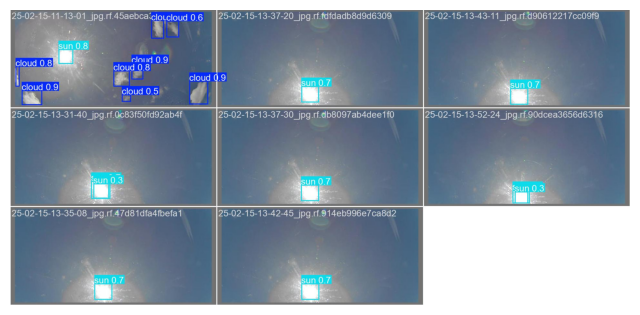

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt

# Find the latest YOLO prediction folder
prediction_folders = sorted(glob.glob("/content/runs/detect/*"), key=lambda x: os.path.getctime(x), reverse=True)
if len(prediction_folders) == 0:
    print("No prediction folder found!")
else:
    latest_prediction_folder = prediction_folders[0]
    print(f"Using predictions from: {latest_prediction_folder}")

    # Find the first image in the prediction folder
    predicted_images = glob.glob(latest_prediction_folder + "/*.jpg")  # Get all images
    if len(predicted_images) == 0:
        print("No predicted images found!")
    else:
        output_image_path = predicted_images[0]  # Take the first predicted image
        print(f"Displaying: {output_image_path}")

        # Load and display the output image
        output_image = cv2.imread(output_image_path)
        output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Display image
        plt.figure(figsize=(8, 8))
        plt.imshow(output_image)
        plt.axis("off")
        plt.show()


When the UTF encoding doesnt work. Restart the run time and run this again and set it to UTF=8

In [ ]:
!apt-get update && apt-get install -y locales && locale-gen en_US.UTF-8

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,315 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,659 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,609 kB]
Hit:13 https://ppa.launchpadcontent.ne

In [ ]:
!update-locale LANG=en_US.UTF-8


In [ ]:
!locale


LANG=en_US.UTF-8
LANGUAGE=en_US
LC_CTYPE="en_US.UTF-8"
LC_NUMERIC="en_US.UTF-8"
LC_TIME="en_US.UTF-8"
LC_COLLATE="en_US.UTF-8"
LC_MONETARY="en_US.UTF-8"
LC_MESSAGES="en_US.UTF-8"
LC_PAPER="en_US.UTF-8"
LC_NAME="en_US.UTF-8"
LC_ADDRESS="en_US.UTF-8"
LC_TELEPHONE="en_US.UTF-8"
LC_MEASUREMENT="en_US.UTF-8"
LC_IDENTIFICATION="en_US.UTF-8"
LC_ALL=en_US.UTF-8


In [ ]:
!find /content -name "best.pt"


/content/runs/detect/train3/weights/best.pt
/content/runs/detect/train2/weights/best.pt


In [ ]:
!ls -lh /content/runs/detect/train2/weights/



total 12M
-rw-r--r-- 1 root root 6.0M Feb 18 17:39 best.pt
-rw-r--r-- 1 root root 6.0M Feb 18 17:39 last.pt


In [ ]:
from google.colab import files
files.download("/content/runs/detect/train2/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>